# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train=[]
y_train=[]
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])#stock price at timestamp t+1
#convert x_train and y_train are list which needs to be converted into numpy array
X_train,y_train=np.array(X_train),np.array(y_train)

### Reshaping

In [5]:
#adding one more dimenstion which is unit
#we use reshape function to add new dimension to numpy array
# A 3D tensor, with shape (batch, timesteps, feature).
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
#X_train.shape[0] -> this gives number of columns(observations of training set)
#X_train.shape[1] -> this gives number of time stamps
# 1 here is number of indicators

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [7]:
regressor = Sequential() # _(regressor) we are predicting continuous outputs

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
#units is number of memory units we need
#return sequence parameter is set to true when you want to add a layer to your neural network
#input shape-> shape of input in X_train (3 dimensions,note:the observtion is taken by default)
regressor.add(Dropout(0.2))#20% neurons will be dropout during each iteration of the training


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))#20% neurons will be dropout during each iteration of the training


### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))#20% neurons will be dropout during each iteration of the training


### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))#20% neurons will be dropout during each iteration of the training


### Adding the output layer

In [12]:
regressor.add(Dense(units=1))#we are predicting the real value so we need only one neuron  that is one dimension

### Compiling the RNN

In [13]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

### Fitting the RNN to the Training set

In [14]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - loss: 0.0899
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0066
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.0057
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - loss: 0.0050
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0050
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.0052
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - loss: 0.0051
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0044
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0039
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - loss: 0.0042
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0047
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0043
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - loss: 0.0040
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - loss: 0.0038
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [15]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [17]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)#vertical axis value is 0 while horizontal is 1
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
#convert x_test are list which needs to be converted into numpy array
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
[[782.1964 ]
 [779.6368 ]
 [780.49896]
 [781.8742 ]
 [785.11053]
 [790.8466 ]
 [795.5331 ]
 [796.88885]
 [797.0863 ]
 [797.11346]
 [797.14557]
 [797.0089 ]
 [796.8805 ]
 [797.51056]
 [798.4511 ]
 [803.4147 ]
 [810.0804 ]
 [816.7633 ]
 [819.6697 ]
 [814.43024]]


### Visualising the results

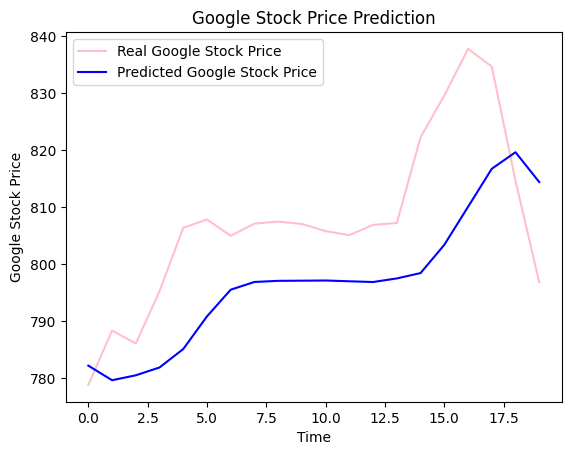

In [18]:
plt.plot(real_stock_price,color='pink',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()